<a href="https://colab.research.google.com/github/nimratkhalsa/MachineLearning/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Linear Regression

In [41]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [42]:
# Downloading the Data

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2024-08-17 21:01:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-08-17 21:01:35 (2.85 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



## View Dataset

In [43]:
df = pd.read_csv("FuelConsumption.csv")

df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


In [44]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [45]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'CO2EMISSIONS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,196,6.7,8.5
1,2.4,4,221,7.7,9.6
2,1.5,4,136,5.8,5.9
3,3.5,6,255,9.1,11.1
4,3.5,6,244,8.7,10.6
5,3.5,6,230,7.7,10.0
6,3.5,6,232,8.1,10.1
7,3.7,6,255,9.0,11.1
8,3.7,6,267,9.5,11.6


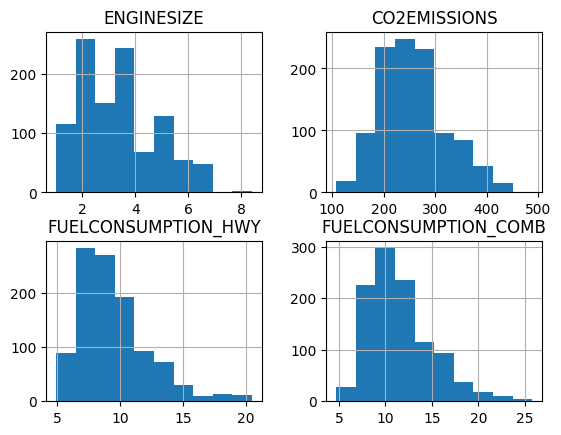

In [46]:
# To Visualise

viz = cdf[['ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

To plot each features against the emission:

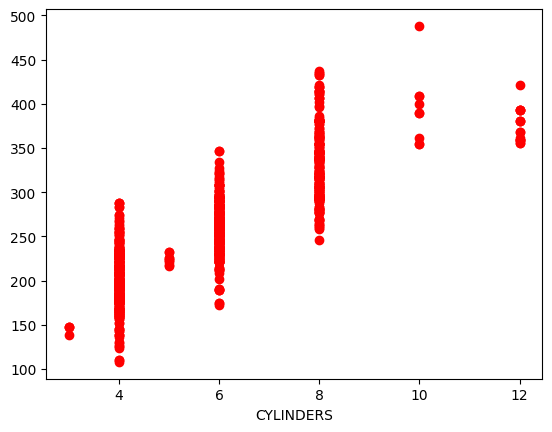

In [47]:
# CYLINDERS vs CO2EMISSION

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='red')
plt.xlabel("CYLINDERS")
plt.show()

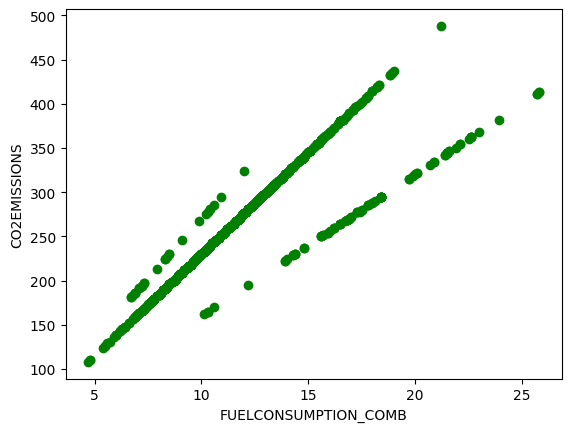

In [48]:
# FUELCONSUMPTION_COMB vs CO2EMISSION

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

## Creating Train and Test dataset

---
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:



In [49]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## Simple Regression Model:

Engine Size is the independent variable and CO2 Emissions is the dependent variable.

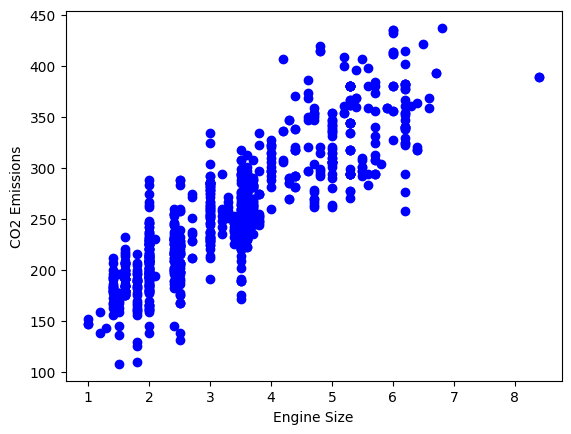

In [50]:
# Train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.show()

## Modeling
Using sklearn package to model data

In [51]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

reg.fit(train_x, train_y)

print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[39.06250987]]
Intercept:  [125.29809429]


## Plot Outputs

Text(0, 0.5, 'CO2 Emissions')

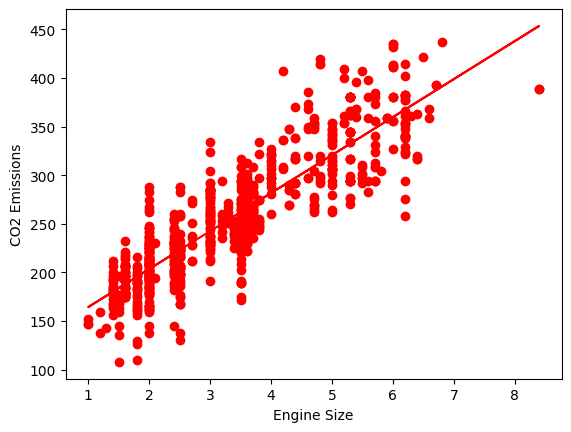

In [52]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "red")
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], '-r')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

##Evaluation
Mean Absolute Error and R2 Score

In [53]:
from sklearn.metrics import r2_score

test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])
test_y_ = reg.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y_)))
print("R2 Score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute Error: 0.00
R2 Score: 0.74
